下载并查看MNIST数据集

In [1]:
from keras.datasets import mnist 

In [2]:
#下载的数据集分为训练部分和测试部分，每个部分又分为特征和标签
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [3]:
#查看下数据集的大小，训练部分有60000项，测试部分有10000项
print("train_data = ", len(train_image))
print("test_data = ", len(test_image))

train_data =  60000
test_data =  10000


In [4]:
#数据集中所有图片都是黑白的，分辨率28*28
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
print("train_image = ", train_image.shape)
print("train_label = ", train_label.shape)

train_image =  (60000, 28, 28)
train_label =  (60000,)


In [6]:
#编写一个函数，用于查看数据集中的图片
import matplotlib.pyplot as plt
def show_mnist_image(image):
    plt.imshow(image, cmap = 'gray')
    plt.show()

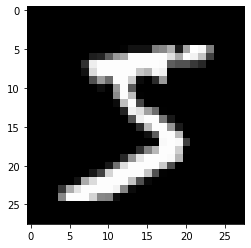

In [7]:
show_mnist_image(train_image[0])

In [8]:
train_label[0]

5

数据的预处理：特征部分归一化转化，数据落在0~1之间，标签部分进行一位有效编码的转换

In [9]:
train_image_array = train_image.reshape(60000, 784).astype(float)
test_image_array = test_image.reshape(10000, 784).astype(float)

In [10]:
print("train_image_array = ", train_image_array.shape)
print("test_image_array = ", test_image_array.shape)

train_image_array =  (60000, 784)
test_image_array =  (10000, 784)


In [11]:
train_image_array[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
train_image_normalize = train_image_array / 255
test_image_normalize = test_image_array / 255

In [13]:
train_image_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
#对标签进行一位有效编码的转换
from keras.utils import np_utils
import numpy as np

train_label_onehotencoding = np_utils.to_categorical(train_label)
test_label_onehotencoding = np_utils.to_categorical(test_label)

In [15]:
train_label_onehotencoding[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

建立多层感知器模型

In [16]:
from keras.models import Sequential
from keras.layers import Dense

建立输入层和隐藏层之间的关系

In [17]:
#Sequential:建立一个线性堆叠的模型
model = Sequential()

In [18]:
#model.add:添加神经网络层
#units:表示隐藏层的神经单元个数
#input_dim:输入层神经单元个数
# kernel_initializer = 'normal':以正太分布的方式产生权重和偏差
#activation = relu ：激活函数
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))

建立隐藏层和输出层之间的关系

In [19]:
#softmax: 预测结果各个可能性的准确率结果加到一起总和为1
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

查看下当前模型

In [20]:
#当前层神经单元个数*上一层神经单元个数+本层神经单元个数
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


配置模型的选项

In [21]:
#loss='categorical_crossentropy':使用交叉熵的方式产生损失函数
#adam:优化器，尽快收敛
#accuracy：目标是提高准确率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

训练模型

In [22]:
#训练过程要分成训练部分和验证部分，80%用于训练（48000）  20%：验证（12000）
#epochs:设置训练次数
#batch_size:每次训练取出数据的个数
#verbose:2 表示训练过程中打印显示训练过程
train_history = model.fit(train_image_normalize, train_label_onehotencoding, validation_split=0.2, epochs=60, batch_size=200, verbose=2)

Epoch 1/60
240/240 - 2s - loss: 0.4379 - accuracy: 0.8831 - val_loss: 0.2150 - val_accuracy: 0.9411
Epoch 2/60
240/240 - 2s - loss: 0.1913 - accuracy: 0.9457 - val_loss: 0.1573 - val_accuracy: 0.9553
Epoch 3/60
240/240 - 2s - loss: 0.1369 - accuracy: 0.9615 - val_loss: 0.1308 - val_accuracy: 0.9628
Epoch 4/60
240/240 - 1s - loss: 0.1055 - accuracy: 0.9699 - val_loss: 0.1156 - val_accuracy: 0.9653
Epoch 5/60
240/240 - 1s - loss: 0.0833 - accuracy: 0.9762 - val_loss: 0.0991 - val_accuracy: 0.9710
Epoch 6/60
240/240 - 1s - loss: 0.0672 - accuracy: 0.9816 - val_loss: 0.0941 - val_accuracy: 0.9707
Epoch 7/60
240/240 - 1s - loss: 0.0555 - accuracy: 0.9851 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 8/60
240/240 - 1s - loss: 0.0459 - accuracy: 0.9875 - val_loss: 0.0846 - val_accuracy: 0.9735
Epoch 9/60
240/240 - 1s - loss: 0.0377 - accuracy: 0.9906 - val_loss: 0.0828 - val_accuracy: 0.9756
Epoch 10/60
240/240 - 1s - loss: 0.0312 - accuracy: 0.9925 - val_loss: 0.0781 - val_accuracy: 0.9764

In [23]:
print(train_history.history['accuracy'])
print("-------------------------------------------------------------------------------")
print(train_history.history['val_accuracy'])
print("-------------------------------------------------------------------------------")
print(train_history.history['loss'])
print("-------------------------------------------------------------------------------")
print(train_history.history['val_loss'])

[0.8830833435058594, 0.9457499980926514, 0.9614791870117188, 0.9698541760444641, 0.9761666655540466, 0.9815624952316284, 0.9850624799728394, 0.987541675567627, 0.9905624985694885, 0.992479145526886, 0.9941458106040955, 0.9958750009536743, 0.9962916374206543, 0.997041642665863, 0.9977499842643738, 0.9982916712760925, 0.9987916946411133, 0.9990416765213013, 0.9994583129882812, 0.9994583129882812, 0.9998124837875366, 0.9998958110809326, 0.99979168176651, 0.99979168176651, 0.9997708201408386, 1.0, 0.9994166493415833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9992291927337646, 0.9939583539962769, 0.9993125200271606, 0.9999791383743286, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
-------------------------------------------------------------------------------
[0.9410833120346069, 0.9553333520889282, 0.9628333449363708, 0.9652500152587891, 0.9710000157356262, 0.9706666469573975, 0.9740833044052124, 0.9735000133514404, 0.9755833148956

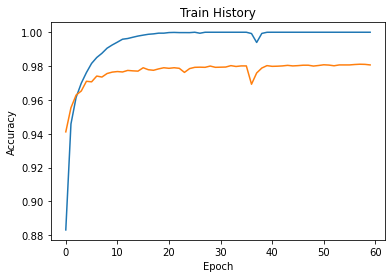

In [24]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title("Train History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()